<img src="JurassicPark.PNG">

Take a look at the image above. What are the dominant colours? Now, what if we want to create a program that can automatically find them?

## __K-Means Clustering__
So what exactly is k-means?

K-means is a clustering algorithm.

The goal is to partition n data points into k clusters. Each of the n data points will be assigned to a cluster with the nearest mean. The mean of each cluster is called its “centroid” or “center”.

Overall, applying k-means yields k separate clusters of the original n data points. Data points inside a particular cluster are considered to be “more similar” to each other than data points that belong to other clusters.

In our case, we will be clustering the pixel intensities of a RGB image. Given a MxN size image, we thus have MxN pixels, each consisting of three components: Red, Green, and Blue respectively.

We will treat these MxN pixels as our data points and cluster them using k-means.

Pixels that belong to a given cluster will be more similar in color than pixels belonging to a separate cluster.

One caveat of k-means is that we need to specify the number of clusters we want to generate ahead of time. There are algorithms that automatically select the optimal value of k.

In [4]:
#!pip install utils

In [5]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

In [6]:
#image ='JurassicPark.PNG'
image='Joker.jpeg'
clusters = 7

In [7]:

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


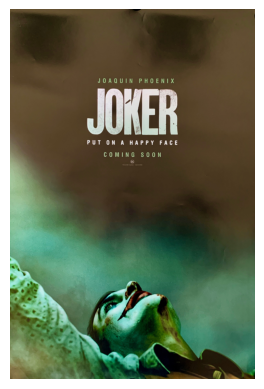

In [8]:
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [9]:
image

array([[[ 98,  79,  49],
        [102,  83,  53],
        [ 97,  78,  48],
        ...,
        [107,  87,  60],
        [109,  89,  62],
        [117,  97,  70]],

       [[101,  82,  52],
        [101,  82,  52],
        [ 98,  79,  49],
        ...,
        [ 86,  66,  39],
        [ 85,  66,  36],
        [ 89,  69,  42]],

       [[103,  84,  54],
        [ 99,  80,  50],
        [ 98,  79,  49],
        ...,
        [ 87,  68,  38],
        [ 87,  68,  36],
        [ 89,  70,  40]],

       ...,

       [[ 97,  83,  44],
        [ 99,  85,  46],
        [100,  86,  49],
        ...,
        [ 23,  14,   0],
        [ 25,  16,   0],
        [ 26,  19,   3]],

       [[ 98,  84,  45],
        [101,  87,  48],
        [103,  89,  52],
        ...,
        [ 25,  16,   0],
        [ 25,  16,   1],
        [ 24,  16,   3]],

       [[ 99,  85,  48],
        [102,  88,  51],
        [100,  86,  49],
        ...,
        [ 26,  17,   0],
        [ 25,  16,   1],
        [ 21,  13,   0]]

In [10]:
image.shape  # reshape (469, 643, 3) --> (469*643, 3) ndims = 2  [0,0] [0,1] [0,2]

(3815, 2525, 3)

In [11]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3)) # rows x columns to flatten, 3 because we have 3 color planes

In [12]:
image  # [[15,20,255], [3,59,2], [72,12,12], [99,78,87]]  c1 = [15,80,105], c2, c3

array([[ 98,  79,  49],
       [102,  83,  53],
       [ 97,  78,  48],
       ...,
       [ 26,  17,   0],
       [ 25,  16,   1],
       [ 21,  13,   0]], dtype=uint8)

In [13]:
# cluster the pixel intensities
clt = KMeans(n_clusters = clusters)
clt.fit(image) # [[1,2,3], [4,5,6], [7,8,9].......]

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [14]:
# import the necessary packages
import numpy as np
import cv2


def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

In [15]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    # return the bar chart
    return bar

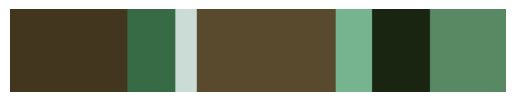

In [16]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

Now you can check it with other pictures!